<a href="https://colab.research.google.com/github/mcslender97/PySparl-practice/blob/main/Pyspark_LR_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import pyspark.pandas as ps
import findspark
import pandas as pd
import matplotlib
import seaborn
import sklearn

In [62]:
findspark.init()# auto find Spark installation for easy init
from pyspark.sql import SparkSession

In [63]:
spark=SparkSession.builder.master('local[*]').getOrCreate()# start Spark session

In [64]:
df=spark.read.csv("/content/Iris.csv",header=True, inferSchema=True)

In [65]:
df

DataFrame[Id: int, SepalLengthCm: double, SepalWidthCm: double, PetalLengthCm: double, PetalWidthCm: double, Species: string]

In [100]:

# Find count for empty, None, Null, Nan with string literals.
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

+---+-------------+------------+-------------+------------+-------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species|
+---+-------------+------------+-------------+------------+-------+
|  0|            0|           0|            0|           0|      0|
+---+-------------+------------+-------------+------------+-------+



In [66]:
df.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [67]:
df.filter("SepalWidthCm>4").show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
| 16|          5.7|         4.4|          1.5|         0.4|Iris-setosa|
| 33|          5.2|         4.1|          1.5|         0.1|Iris-setosa|
| 34|          5.5|         4.2|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+



In [68]:
df.filter("PetalWidthCm>1").show()

+---+-------------+------------+-------------+------------+---------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|        Species|
+---+-------------+------------+-------------+------------+---------------+
| 51|          7.0|         3.2|          4.7|         1.4|Iris-versicolor|
| 52|          6.4|         3.2|          4.5|         1.5|Iris-versicolor|
| 53|          6.9|         3.1|          4.9|         1.5|Iris-versicolor|
| 54|          5.5|         2.3|          4.0|         1.3|Iris-versicolor|
| 55|          6.5|         2.8|          4.6|         1.5|Iris-versicolor|
| 56|          5.7|         2.8|          4.5|         1.3|Iris-versicolor|
| 57|          6.3|         3.3|          4.7|         1.6|Iris-versicolor|
| 59|          6.6|         2.9|          4.6|         1.3|Iris-versicolor|
| 60|          5.2|         2.7|          3.9|         1.4|Iris-versicolor|
| 62|          5.9|         3.0|          4.2|         1.5|Iris-versicolor|
| 64|       

In [69]:
df.filter("PetalWidthCm>2").show()

+---+-------------+------------+-------------+------------+--------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|       Species|
+---+-------------+------------+-------------+------------+--------------+
|101|          6.3|         3.3|          6.0|         2.5|Iris-virginica|
|103|          7.1|         3.0|          5.9|         2.1|Iris-virginica|
|105|          6.5|         3.0|          5.8|         2.2|Iris-virginica|
|106|          7.6|         3.0|          6.6|         2.1|Iris-virginica|
|110|          7.2|         3.6|          6.1|         2.5|Iris-virginica|
|113|          6.8|         3.0|          5.5|         2.1|Iris-virginica|
|115|          5.8|         2.8|          5.1|         2.4|Iris-virginica|
|116|          6.4|         3.2|          5.3|         2.3|Iris-virginica|
|118|          7.7|         3.8|          6.7|         2.2|Iris-virginica|
|119|          7.7|         2.6|          6.9|         2.3|Iris-virginica|
|121|          6.9|      

In [70]:
dfr=df.toPandas()

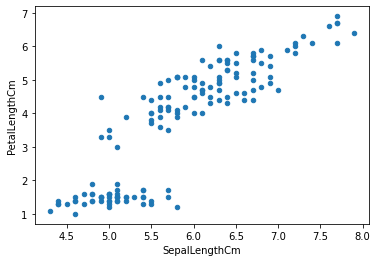

In [71]:
# 7.Try to know the relationship between sepallength and petallength and draw a scatter plot between them and show the relationship between them
dfr.plot.scatter(x='SepalLengthCm',y='PetalLengthCm')

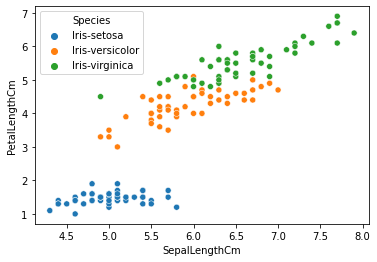

In [72]:
# 8.Now apply species as hue in the same scatter plot for better visibility and understanding
import seaborn as sns
sns.scatterplot(data=dfr,x="SepalLengthCm",y="PetalLengthCm",hue="Species")

Applying Linear Regression
1)Model 1

In [73]:
# a)Create an object named as y which is storing the dataframe of a dependent variable names as 'sepallengthcm'
# b)Create an object named as x which is storing the dataframe of an independent variable names as 'sepalwidthcm'
x_df=df.select(['SepalWidthCm'])
y_df=df.select(['SepalLengthCm'])

In [74]:
x_split=x_df.randomSplit([0.7,0.3])
x_train=x_split[0]
x_test=x_split[1]

In [75]:
y_split=y_df.randomSplit([0.7,0.3])
y_train=y_split[0]
y_test=y_split[1]

In [76]:
x_train.show(5)

+------------+
|SepalWidthCm|
+------------+
|         2.2|
|         2.3|
|         2.4|
|         2.4|
|         2.4|
+------------+
only showing top 5 rows



In [77]:
from pyspark.ml.regression import LinearRegression # import ML regression libarary

In [78]:
# Pyspark linear regression requires inputs to be of vector type
# Use Vector Assembler to create vector columns
from pyspark.ml.feature import VectorAssembler
import numpy as np
assembler=VectorAssembler().setInputCols(['SepalWidthCm']).setOutputCol('Independent variables')

In [79]:
# Set output column
# Returns an array of elements after applying a transformation to each element in the input array
output = assembler.transform(df)
output.select("Independent variables").show()

+---------------------+
|Independent variables|
+---------------------+
|                [3.5]|
|                [3.0]|
|                [3.2]|
|                [3.1]|
|                [3.6]|
|                [3.9]|
|                [3.4]|
|                [3.4]|
|                [2.9]|
|                [3.1]|
|                [3.7]|
|                [3.4]|
|                [3.0]|
|                [3.0]|
|                [4.0]|
|                [4.4]|
|                [3.9]|
|                [3.5]|
|                [3.8]|
|                [3.8]|
+---------------------+
only showing top 20 rows



In [80]:
finalised_data = output.select("Independent variables", "SepalLengthCm") # select input and predicted output

In [81]:
train_data, test_data = finalised_data.randomSplit([0.7, 0.3]) #split the data, 70% train, 30% test


In [82]:
train_data.show(5)

+---------------------+-------------+
|Independent variables|SepalLengthCm|
+---------------------+-------------+
|                [2.0]|          5.0|
|                [2.2]|          6.0|
|                [2.2]|          6.0|
|                [2.2]|          6.2|
|                [2.3]|          4.5|
+---------------------+-------------+
only showing top 5 rows



In [83]:
test_data.show(5)

+---------------------+-------------+
|Independent variables|SepalLengthCm|
+---------------------+-------------+
|                [2.3]|          6.3|
|                [2.4]|          4.9|
|                [2.4]|          5.5|
|                [2.5]|          4.9|
|                [2.5]|          6.3|
+---------------------+-------------+
only showing top 5 rows



In [84]:
# Fit the model

regressor = LinearRegression(featuresCol = 'Independent variables', labelCol = 'SepalLengthCm')
regressor = regressor.fit(train_data)


In [85]:
# predict values
pred_results = regressor.evaluate(test_data)
pred_results.predictions.show()# default prediction returned is the Root mean squared error (deviation) or rmse

+---------------------+-------------+-----------------+
|Independent variables|SepalLengthCm|       prediction|
+---------------------+-------------+-----------------+
|                [2.3]|          6.3|5.986669374104127|
|                [2.4]|          4.9|5.965616817964618|
|                [2.4]|          5.5|5.965616817964618|
|                [2.5]|          4.9|5.944564261825109|
|                [2.5]|          6.3|5.944564261825109|
|                [2.5]|          6.7|5.944564261825109|
|                [2.6]|          5.5|  5.9235117056856|
|                [2.6]|          7.7|  5.9235117056856|
|                [2.7]|          5.2|5.902459149546091|
|                [2.7]|          5.8|5.902459149546091|
|                [2.7]|          6.0|5.902459149546091|
|                [2.8]|          5.6|5.881406593406583|
|                [2.8]|          6.1|5.881406593406583|
|                [2.8]|          6.2|5.881406593406583|
|                [2.9]|          5.6|5.860354037

In [86]:
y_pred=pred_results.predictions['SepalLengthCm']
pred_results.meanSquaredError

0.6985450077138511

In [87]:
# Model 2

In [88]:
from pyspark.ml.feature import VectorAssembler
import numpy as np
assembler=VectorAssembler().setInputCols(['SepalWidthCm','PetalLengthCm','PetalWidthCm']).setOutputCol('Independent variables')
output = assembler.transform(df)
output.select("Independent variables").show()

+---------------------+
|Independent variables|
+---------------------+
|        [3.5,1.4,0.2]|
|        [3.0,1.4,0.2]|
|        [3.2,1.3,0.2]|
|        [3.1,1.5,0.2]|
|        [3.6,1.4,0.2]|
|        [3.9,1.7,0.4]|
|        [3.4,1.4,0.3]|
|        [3.4,1.5,0.2]|
|        [2.9,1.4,0.2]|
|        [3.1,1.5,0.1]|
|        [3.7,1.5,0.2]|
|        [3.4,1.6,0.2]|
|        [3.0,1.4,0.1]|
|        [3.0,1.1,0.1]|
|        [4.0,1.2,0.2]|
|        [4.4,1.5,0.4]|
|        [3.9,1.3,0.4]|
|        [3.5,1.4,0.3]|
|        [3.8,1.7,0.3]|
|        [3.8,1.5,0.3]|
+---------------------+
only showing top 20 rows



In [89]:
finalised_data = output.select("Independent variables", "SepalLengthCm")

In [90]:
train_data, test_data = finalised_data.randomSplit([0.7, 0.3])

In [91]:
train_data.show(5)

+---------------------+-------------+
|Independent variables|SepalLengthCm|
+---------------------+-------------+
|        [2.0,3.5,1.0]|          5.0|
|        [2.2,4.5,1.5]|          6.2|
|        [2.2,5.0,1.5]|          6.0|
|        [2.3,1.3,0.3]|          4.5|
|        [2.3,3.3,1.0]|          5.0|
+---------------------+-------------+
only showing top 5 rows



In [92]:
test_data.show(5)

+---------------------+-------------+
|Independent variables|SepalLengthCm|
+---------------------+-------------+
|        [2.2,4.0,1.0]|          6.0|
|        [2.3,4.0,1.3]|          5.5|
|        [2.4,3.3,1.0]|          4.9|
|        [2.4,3.8,1.1]|          5.5|
|        [2.5,3.0,1.1]|          5.1|
+---------------------+-------------+
only showing top 5 rows



In [93]:
regressor = LinearRegression(featuresCol = 'Independent variables', labelCol = 'SepalLengthCm')
regressor = regressor.fit(train_data)

In [94]:
pred_results = regressor.evaluate(test_data)
pred_results.predictions.show()

+---------------------+-------------+------------------+
|Independent variables|SepalLengthCm|        prediction|
+---------------------+-------------+------------------+
|        [2.2,4.0,1.0]|          6.0| 5.601180531702735|
|        [2.3,4.0,1.3]|          5.5| 5.451085898453519|
|        [2.4,3.3,1.0]|          4.9| 5.187705366671436|
|        [2.4,3.8,1.1]|          5.5| 5.504195569153457|
|        [2.5,3.0,1.1]|          5.1| 4.948090642132734|
|        [2.5,5.0,1.9]|          6.3| 5.927268508633025|
|        [2.6,5.6,1.4]|          6.1| 6.816562888246164|
|        [2.7,3.9,1.4]|          5.2| 5.561723272215294|
|        [2.7,4.9,1.8]|          6.3|  6.05131220546544|
|        [2.7,5.1,1.9]|          5.8| 6.134890844944078|
|        [2.8,4.6,1.5]|          6.5| 6.098480424354532|
|        [2.8,4.8,1.8]|          6.2| 6.038667592119275|
|        [2.9,4.6,1.3]|          6.6|  6.30686447039006|
|        [3.0,1.1,0.1]|          4.3|4.5149043066222845|
|        [3.0,1.4,0.1]|        

In [95]:
y_pred=pred_results.predictions['SepalLengthCm']

In [96]:
pred_results.meanSquaredError

0.1009627278910953

In [ ]:
sns.regplot()